### Logistic Regression

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

I prepared the file in advanced. You can see the preparation steps in https://drive.google.com/file/d/1SZP3qq7gbRbjia_XpQWDGOI8u3YEA11L/view?usp=sharing

In [65]:
df = pd.read_pickle('loan_df')

In [66]:
df

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,accepted,co_applicant_True
76,1,1,1,1,427.0,3,249,10,186,2,5,1,92.0,4974.0,27.662,79696.0,100.000,1175.0,1354.0,1,0
200,1,1,1,1,179.0,3,163,2,55,1,5,1,186.0,6808.0,38.949,63826.0,100.000,856.0,522.0,1,0
221,1,1,1,1,213.0,3,102,22,123,2,5,1,55.0,6634.0,11.789,70142.0,100.000,2031.0,2681.0,1,0
460,1,1,1,1,338.0,3,139,3,299,2,5,1,89.0,4194.0,14.194,100783.0,100.000,1164.0,1557.0,1,0
477,1,1,1,1,69.0,3,399,26,57,2,6,2,64.0,2842.0,11.398,53603.0,100.000,979.0,1199.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156359,1,1,1,1,264.0,3,171,52,257,2,5,1,64.0,5731.0,16.494,76042.0,100.000,2089.0,2373.0,1,0
156659,1,1,1,1,115.0,3,385,22,11,2,5,1,77.0,4508.0,5.603,67845.0,93.562,1385.0,1463.0,1,0
156687,1,1,1,1,54.0,3,385,22,11,3,6,3,68.0,5056.0,4.140,71640.0,96.725,1837.0,2129.0,0,0
156976,1,1,1,1,1886.0,3,24,37,20,3,6,3,626.0,3762.0,43.856,62954.0,100.000,597.0,892.0,1,0


This is our dependent variable

In [67]:
df['accepted'].value_counts()

1    768
0    399
Name: accepted, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


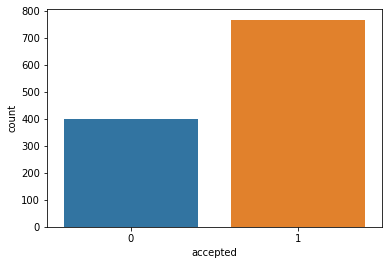

In [68]:
sns.countplot(df['accepted'])

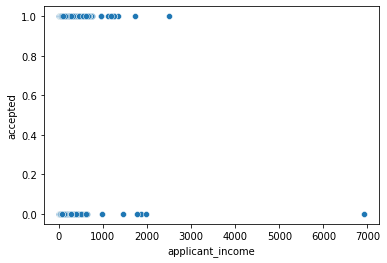

In [69]:
sns.scatterplot(x=df['applicant_income'], y=df['accepted'])

We can't put a best fit regression line with such data. We have to come up with another method

#### What is Logistic Regression?

- Model the probablity of an event occuring depending on the values of the independent vairbales (categoical or numerical).

- Estimate the probablity of an event occurs for a randomly selected observation vs. the probablity the event does not occur

- Predict the effect of a series of variale on binary response variable

- Classify observations by estimating the probability that the event is in a particular category

Probability is not linear

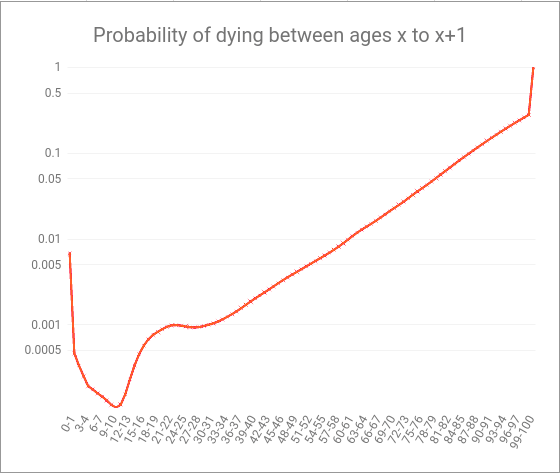

In [70]:
from IPython.display import Image
Image('https://i.redd.it/ov7izfo89ed01.png')

#### Mapping Probability to Infinit Range

In [71]:
import scipy as sc

Let's generate numbers ranging from 0 to 1

In [72]:
x = np.random.rand(100)

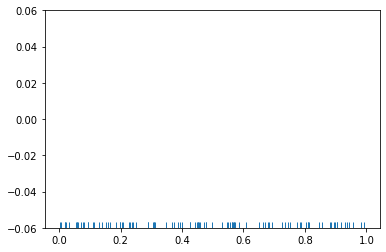

In [73]:
sns.rugplot(x)

The logit function is defined as logit(p) = log(p/(1-p)). Note that logit(0) = -inf, logit(1) = inf, and logit(p) for p<0 or p>1 yields nan. 

Using the logit, we can map probability which ranges between 0 to 1, to a scale of -inf to +inf

In [74]:
logit_values = sc.special.logit(x)

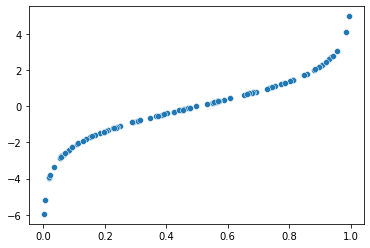

In [75]:
sns.scatterplot(x=x, y=logit_values)

In [76]:
inverse_logit_values = sc.special.expit(logit_values)

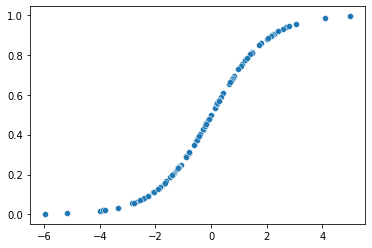

In [77]:
sns.scatterplot(x=logit_values, y=inverse_logit_values)

This is a Sigmoid function curve ("S" curve)

Our puruse is to find the orange function which will predict the odds of being accepted or not accepted

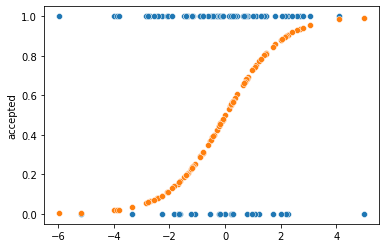

In [78]:
sns.scatterplot(x=logit_values, y=df['accepted'][:100])
sns.scatterplot(x=logit_values, y=inverse_logit_values)

The regression coefficients for logistic regression is calculated using <b>maximum likelihood estimation</b> or MLE, instead of least squares method. 

We will not get into the details of the maximum likelihood estimation algorithm. 
For additional read: https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1

In [79]:
from IPython.display import Image
Image('./maximum_likelihood.png')

#### Running Logistic Regression

In [80]:
import sklearn.linear_model as sklin
from sklearn.model_selection import train_test_split
import sklearn.metrics as skmet

In [116]:
model = sklin.LogisticRegression(max_iter=1000, class_weight={0: 0.8, 1: 0.2})

In [117]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('accepted',axis=1), df['accepted'], test_size=0.25, random_state=42)

In [118]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight={0: 0.8, 1: 0.2}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
pred = model.predict(X_test)

In [120]:
np.mean(pred != y_test)

0.6472602739726028

In [121]:
score = model.score(X_test, y_test)
score 

0.3527397260273973

In [122]:
model.coef_

array([[-8.37451444e-05, -8.37451444e-05, -8.37451444e-05,
        -2.45497982e-04, -3.39161325e-05, -2.51235433e-04,
        -2.87531324e-05,  5.21675376e-04,  1.37424424e-04,
        -7.04003399e-06, -4.10557523e-05, -3.09133898e-04,
        -2.23559254e-05,  7.06787709e-05, -1.37644991e-02,
        -1.48527291e-06, -1.12355581e-03, -1.06386850e-04,
        -1.55298801e-04,  0.00000000e+00]])

In [123]:
coeff = pd.DataFrame(model.coef_.reshape(-1,1), X_train.columns, columns=['Coeff'])
coeff['abs'] = np.abs(coeff['Coeff'])
coeff.sort_values(by=['abs'], ascending=False)

,Coeff,abs
minority_population_pct,-0.013764,0.013764
tract_to_msa_md_income_pct,-0.001124,0.001124
state_code,0.000522,0.000522
applicant_sex,-0.000309,0.000309
preapproval,-0.000251,0.000251
occupancy,-0.000245,0.000245
number_of_1_to_4_family_units,-0.000155,0.000155
county_code,0.000137,0.000137
number_of_owner-occupied_units,-0.000106,0.000106
loan_type,-0.000084,0.000084


In [124]:
model.intercept_

array([-8.37453767e-05])

### Tools To Assess The Model

Following are two important tools which can be used in order to assess the model accuracy, and detecting the pitfalls. These tools apply for all the classification ML models.

#### Confusion Matrix

In [125]:
import sklearn.metrics as skmet
cm = skmet.confusion_matrix(y_test, pred)
print(cm)

[[102   0]
 [189   1]]


##### Display Using Seaborn

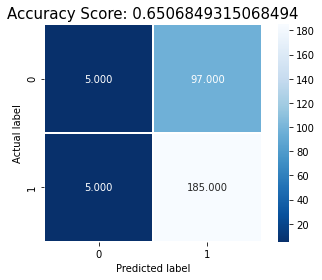

In [94]:
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

We're not predicting the zeros good enough! Need to tune the model in order to predict zeros better. The good news is that we're predicting the 1ns pretty good.

##### Display Using Matplotlib

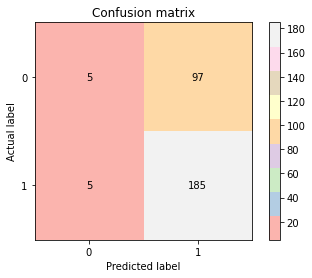

In [95]:
#plt.figure(figsize=(9,9))
fig, ax = plt.subplots()
labels = ["0", "1"]
plt.imshow(cm, cmap='Pastel1')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

plt.show()

##### Classification Report

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report

In [96]:
print(skmet.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.50      0.05      0.09       102
           1       0.66      0.97      0.78       190

    accuracy                           0.65       292
   macro avg       0.58      0.51      0.44       292
weighted avg       0.60      0.65      0.54       292



Intuitively, precision is the ability of the classifier not to label as positive a sample that is negative, and recall is the ability of the classifier to find all the positive samples.

The F-measure (
 and 
 measures) can be interpreted as a weighted harmonic mean of the precision and recall. A 
 measure reaches its best value at 1 and its worst score at 0.

#### Display Misclassified Observations

In [97]:
df.loc[(y_test != pred).index]

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,accepted,co_applicant_True
90008,1,1,1,1,10.0,3,205,2,83,2,5,1,34.0,5370.0,16.786,60284.0,94.898,2156.0,3128.0,0,0
150306,1,1,1,1,293.0,3,91,37,321,3,6,3,95.0,2210.0,17.817,69762.0,100.000,802.0,917.0,1,0
5815,1,1,1,1,107.0,3,-1,17,316,2,5,1,43.0,4547.0,23.854,76878.0,100.000,1316.0,1891.0,1,0
7783,1,1,1,1,995.0,3,177,22,61,3,6,3,437.0,4716.0,21.672,101170.0,100.000,1798.0,1303.0,0,0
136741,1,1,1,1,178.0,3,350,38,41,2,5,1,44.0,5233.0,11.293,84583.0,96.446,1605.0,1741.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,1,1,1,1,156.0,3,207,41,79,1,5,1,38.0,3122.0,14.120,81236.0,100.000,1172.0,1045.0,1,0
92957,1,1,1,1,206.0,3,101,16,136,2,6,1,40.0,9180.0,31.105,72071.0,80.023,1973.0,3131.0,0,0
148325,1,1,1,2,432.0,3,298,31,3,2,5,1,198.0,8428.0,13.728,62933.0,100.000,2321.0,3094.0,1,0
92273,1,1,1,1,111.0,3,-1,40,163,2,5,1,83.0,1641.0,12.688,60315.0,78.754,609.0,1252.0,1,0


#### Calculating Probability for Specific Observation

In [98]:
first_line = df.drop('accepted',axis=1).iloc[0]
first_line

loan_type                             1.000
property_type                         1.000
loan_purpose                          1.000
occupancy                             1.000
loan_amount                         427.000
preapproval                           3.000
msa_md                              249.000
state_code                           10.000
county_code                         186.000
applicant_ethnicity                   2.000
applicant_race                        5.000
applicant_sex                         1.000
applicant_income                     92.000
population                         4974.000
minority_population_pct              27.662
ffiecmedian_family_income         79696.000
tract_to_msa_md_income_pct          100.000
number_of_owner-occupied_units     1175.000
number_of_1_to_4_family_units      1354.000
co_applicant_True                     0.000
Name: 76, dtype: float64

In [99]:
model.predict([first_line])[0]

1

In [100]:
model.predict_proba([first_line])[0][1]

0.7002504320213694

probabiltiy of 0.7 of being accepted

In [101]:
df[df ['applicant_income'] > 200]

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,accepted,co_applicant_True
1418,1,1,1,1,1730.0,3,318,37,274,2,5,1,585.0,4175.0,15.721,84469.0,100.00,1345.0,2008.0,1,0
2133,1,1,1,1,879.0,3,68,37,45,3,6,3,261.0,3628.0,55.855,98442.0,100.00,635.0,790.0,1,0
2804,1,1,1,1,739.0,3,395,37,165,3,6,3,204.0,4854.0,40.396,92002.0,100.00,1281.0,1366.0,1,0
2814,1,1,1,1,466.0,3,207,41,49,3,6,3,202.0,7563.0,13.822,79308.0,100.00,1707.0,2040.0,1,0
3800,1,1,1,1,580.0,3,314,3,57,2,5,1,244.0,6271.0,8.592,69335.0,100.00,1850.0,1928.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155127,1,1,1,1,694.0,3,322,37,100,2,5,2,233.0,6061.0,40.971,107627.0,96.09,1406.0,1860.0,1,0
155459,1,1,1,2,126.0,3,376,20,11,3,6,3,267.0,3491.0,46.376,58674.0,100.00,1012.0,1310.0,1,0
155885,1,1,1,1,346.0,3,314,3,122,3,6,3,615.0,2842.0,22.136,69596.0,100.00,886.0,961.0,0,0
156355,1,1,1,2,283.0,3,314,48,321,2,5,1,266.0,11480.0,17.449,70821.0,100.00,2293.0,204.0,0,0


In [102]:
df[df ['applicant_income'] < 10]

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,accepted,co_applicant_True


In [126]:
results = X_test.apply(predict_proba,  axis=1)
results

NameError: ignored

In [ ]:
results.hist()

In [ ]:
sns.scatterplot(x=X_test['applicant_income'], y=results)

In [ ]:
res = results.apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
results[results < 0.5].count()

In [ ]:
pred[pred == 0].shape

##### Predicted Value

In [ ]:
sns.scatterplot(x=X_test['applicant_income'], y=pred)

##### Real Value

In [ ]:
sns.scatterplot(x=X_test['applicant_income'], y=y_test)

### Practice

Logistic Regression lab: https://drive.google.com/file/d/1qNaDPjjRH4EJVp-XSNxcmkMhe35bYhUT/view?usp=sharing

### Weighted Logistic Regression

In the case of an imbalanced data set, we can adjust the weight of each label in order to try to predict better results

If weight is not given, all classes are supposed to have weight one.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

A best practice for using the class weighting is to use the inverse of the class distribution present in the training dataset.

For example, the class distribution of the training dataset is a 1:100 ratio for the minority class to the majority class. The inversion of this ratio could be used with 1 for the majority class and 100 for the minority class;

https://machinelearningmastery.com/cost-sensitive-logistic-regression/

In [ ]:
y_train.value_counts()

In [ ]:
weights = {0:1811, 1:906}
model2 = sklin.LogisticRegression(solver='lbfgs', class_weight=weights, max_iter=1000)

In [ ]:
model2.fit(X_train,y_train)

In [ ]:
model2.score(X_test, y_test)

Using a class weighting that is the inverse ratio of the training data is just a heuristic.

It is possible that better performance can be achieved with a different class weighting, and this too will depend on the choice of performance metric used to evaluate the model.

In this section, we will search a range of different class weightings for weighted logistic regression and discover which results in the best score.

In [ ]:
options = np.linspace(0,1, 10)

In [ ]:
scores = []
for opt in options:
    weights = {0:opt, 1:1}
    model2 = sklin.LogisticRegression(solver='lbfgs', class_weight=weights, max_iter=1000)
    model2.fit(X_train,y_train)
    scores.append(model2.score(X_test, y_test))
    
scores2 = []
for opt in options:
    weights = {0:1, 1:opt}
    model2 = sklin.LogisticRegression(solver='lbfgs', class_weight=weights, max_iter=1000)
    model2.fit(X_train,y_train)
    scores2.append(model2.score(X_test, y_test))

plt.plot(options, scores)
plt.title("X is smaller than Y")
plt.show()

In [ ]:
plt.plot(options, scores2)
plt.title("Y is smaller than X")
plt.show()